<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

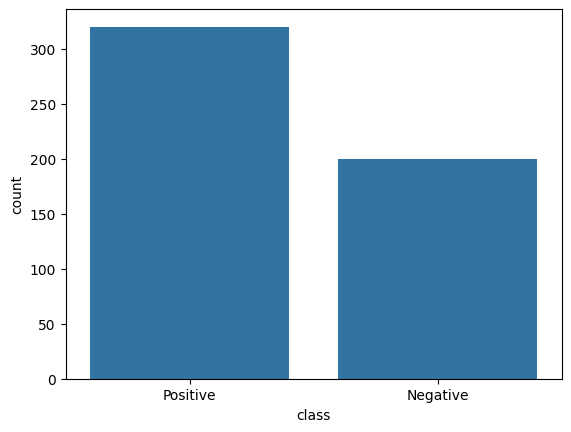

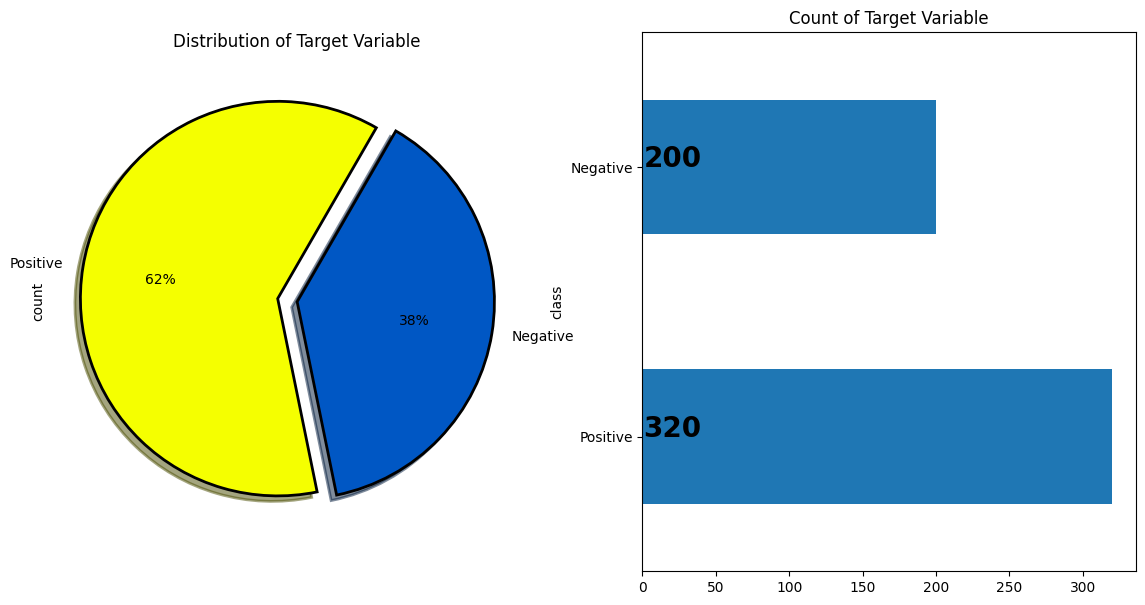

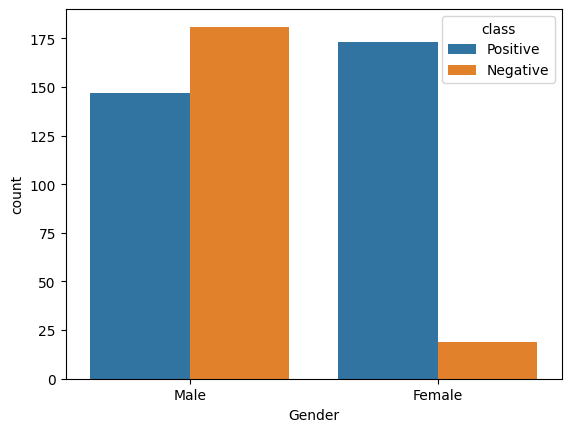

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None
   A

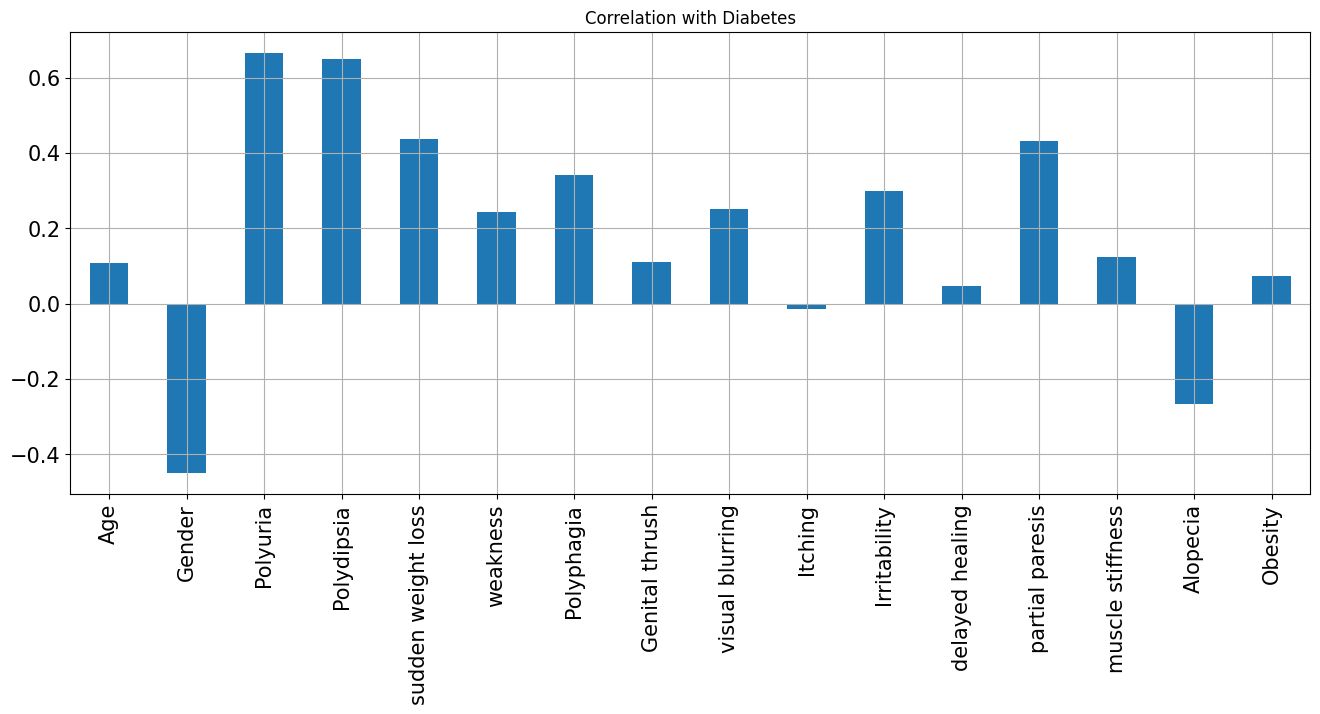

Distribution of target variable in training set
class
1    256
0    160
Name: count, dtype: int64
Distribution of target variable in test set
class
1    64
0    40
Name: count, dtype: int64
          Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
246  0.405405       1         0           0                   0         1   
274  0.554054       1         0           0                   0         0   
424  0.364865       1         1           1                   1         1   
316  0.527027       0         0           0                   0         1   
159  0.297297       0         1           1                   1         1   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
246           0               0                0        1             0   
274           1               0                1        0             0   
424           0               1                0        0             0   
316           0               1                

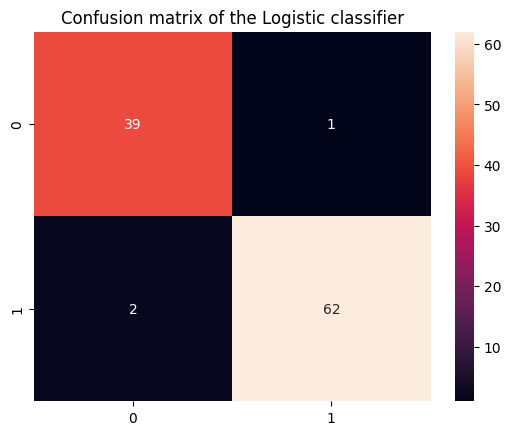

0.975


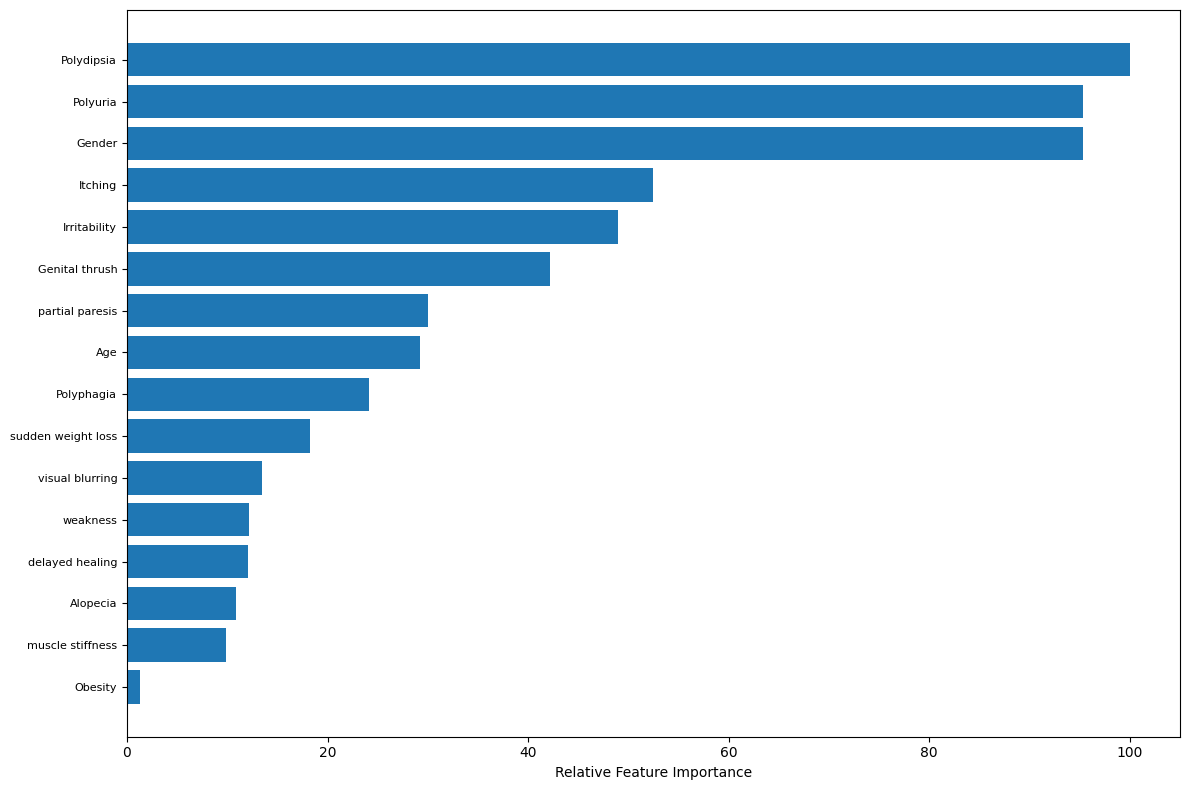

0.9734610917537745
                     Model  Accuracy  Cross Val Accuracy  Precision   Recall  \
0      Logistic Regression  0.971154            0.913240   0.984127  0.96875   
1  Random Forest (Untuned)  0.980769            0.973461   1.000000  0.96875   

   F1 Score       ROC  
0  0.976378  0.971875  
1  0.984127  0.984375  


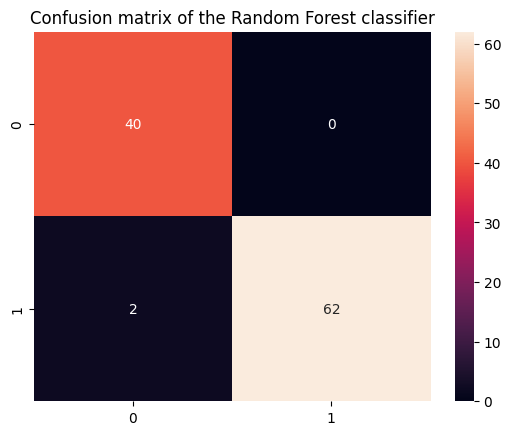

1.0


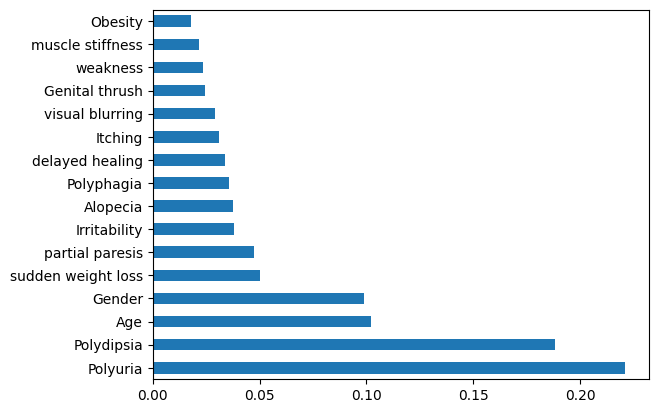

0.9085365853658539
                         Model  Accuracy  Cross Val Accuracy  Precision  \
0          Logistic Regression  0.971154            0.913240   0.984127   
1      Random Forest (Untuned)  0.980769            0.973461   1.000000   
2  Logistic Regression-Post FS  0.961538            0.908537   0.983871   

     Recall  F1 Score       ROC  
0  0.968750  0.976378  0.971875  
1  0.968750  0.984127  0.984375  
2  0.953125  0.968254  0.964063  
                         Model  Accuracy  Cross Val Accuracy  Precision  \
0          Logistic Regression  0.971154            0.913240   0.984127   
1      Random Forest (Untuned)  0.980769            0.973461   1.000000   
2  Logistic Regression-Post FS  0.961538            0.908537   0.983871   
3       Random Forest- Post FS  0.980769            0.961382   1.000000   

     Recall  F1 Score       ROC  
0  0.968750  0.976378  0.971875  
1  0.968750  0.984127  0.984375  
2  0.953125  0.968254  0.964063  
3  0.968750  0.984127  0.984375 

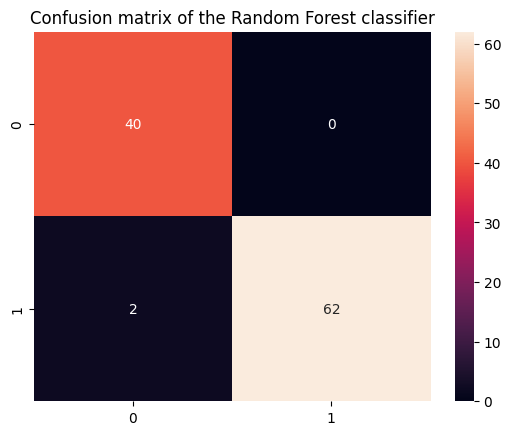

Specificity: 1.0


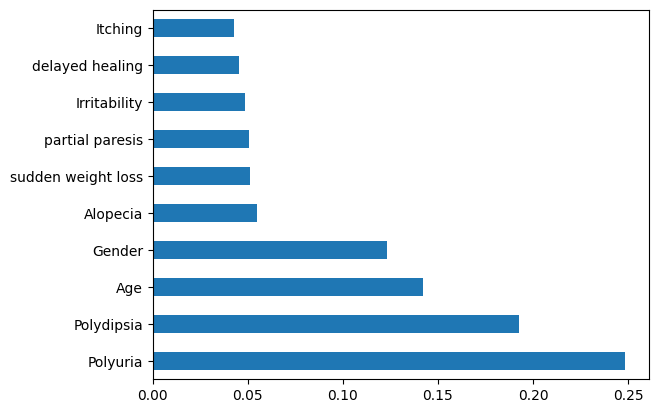

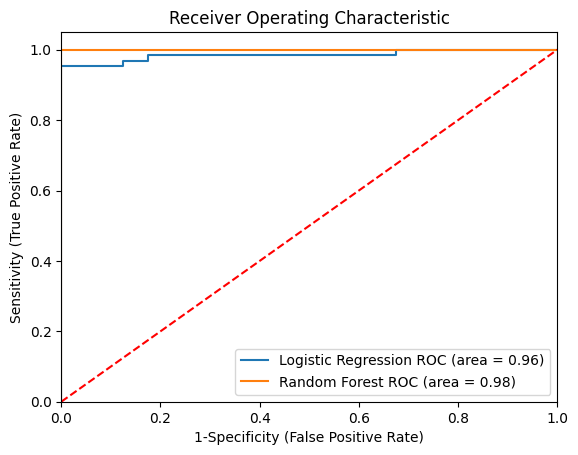

In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Load dataset
df = pd.read_csv('diabetes_data_upload.csv')

# Initial Data Exploration
df.head()
df.isna().sum()
df.info()

# Countplot for the 'class' column
sns.countplot(x='class', data=df)
plt.show()

# Pie chart and bar plot for target variable distribution
plt.figure(figsize=(14, 7))

plt.subplot(121)
df["class"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("prism", 7), startangle=60, labels=["Positive", "Negative"],
                                    wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.1, 0], shadow=True)
plt.title("Distribution of Target Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")
for i, j in enumerate(df["class"].value_counts().values):
    ax.text(.7, i, j, weight="bold", fontsize=20)
plt.title("Count of Target Variable")
plt.show()

# Countplot for 'Gender' column with hue as 'class'
sns.countplot(x='Gender', hue='class', data=df)
plt.show()

# Crosstab plots
plot_criteria = ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100, 2)).style.background_gradient(cmap=cm)

Image(filename='polyuria.jpg')
plot_criteria = ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100, 2)).style.background_gradient(cmap=cm)

Image(filename='polydipsia.jpg')
plot_criteria = ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100, 2)).style.background_gradient(cmap=cm)

# Repeat similar blocks for other plot_criteria and images...

# Encoding target variable
df['class'] = df['class'].apply(lambda x: 0 if x == 'Negative' else 1)

# Separating features and target variable
X = df.drop(['class'], axis=1)
y = df['class']

# Label Encoding for categorical features
objList = X.select_dtypes(include="object").columns
le = LabelEncoder()
for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

print(X.info())
print(X.head())
print(X.corrwith(y))

# Correlation plot
X.corrwith(y).plot.bar(figsize=(16, 6), title="Correlation with Diabetes", fontsize=15, rot=90, grid=True)
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)
print('Distribution of target variable in training set')
print(y_train.value_counts())
print('Distribution of target variable in test set')
print(y_test.value_counts())

# Scaling age feature
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])
print(X_train.head())

# Logistic Regression
logi = LogisticRegression(random_state=0, penalty='l2')
logi.fit(X_train, y_train)

kfold = KFold(n_splits=10, shuffle=True, random_state=7)
scoring = 'accuracy'
acc_logi = cross_val_score(estimator=logi, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(acc_logi.mean())

y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression', acc, acc_logi.mean(), prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
print(results)

cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi, annot=True, fmt="d")
plt.show()

TP = cm_logi[1, 1]  # true positive
TN = cm_logi[0, 0]  # true negatives
FP = cm_logi[0, 1]  # false positives
FN = cm_logi[1, 0]  # false negatives

# Calculate specificity
print(TN / float(TN + FP))

feature_importance = abs(logi.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12, 8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()
plt.show()

# Random Forest Classifier
rf = RandomForestClassifier(criterion='gini', n_estimators=100)
rf.fit(X_train, y_train)

acc_rf = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(acc_rf.mean())

y_predict_r = rf.predict(X_test)
roc = roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest (Untuned)', acc, acc_rf.mean(), prec, rec, f1, roc]],
                             columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results = pd.concat([results, model_results], ignore_index=True)
print(results)

cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.show()

TP = cm_rf[1, 1]  # true positive
TN = cm_rf[0, 0]  # true negatives
FP = cm_rf[0, 1]  # false positives
FN = cm_rf[1, 0]  # false negatives

# Calculate specificity
print(TN / float(TN + FP))

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Feature selection
X_fs = X[['Polyuria', 'Polydipsia', 'Age', 'Gender', 'partial paresis', 'sudden weight loss', 'Irritability', 'delayed healing', 'Alopecia', 'Itching']]
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.2, stratify=y, random_state=1234)

X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

logi.fit(X_train, y_train)
acc_logi = cross_val_score(estimator=logi, X=X_train, y=y_train, cv=kfold, scoring=scoring)
print(acc_logi.mean())

y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

model_results = pd.DataFrame([['Logistic Regression-Post FS', acc, acc_logi.mean(), prec, rec, f1, roc]],
                             columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results = pd.concat([results, model_results], ignore_index=True)
print(results)

rf.fit(X_train, y_train)

# Cross-validation score for RandomForest
acc_rf = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
rf.fit(X_train, y_train)

# Predictions and evaluation metrics for RandomForest
y_predict_r = rf.predict(X_test)
roc = roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

# Storing results for RandomForest after feature selection
model_results = pd.DataFrame([['Random Forest- Post FS', acc, acc_rf.mean(), prec, rec, f1, roc]], columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
results = pd.concat([results, model_results], ignore_index=True)

# Display results
print(results)

# Confusion matrix for RandomForest
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.show()

# Specificity calculation
TP = cm_rf[1, 1]  # True Positive
TN = cm_rf[0, 0]  # True Negative
FP = cm_rf[0, 1]  # False Positive
FN = cm_rf[1, 0]  # False Negative
specificity = TN / float(TN + FP)
print("Specificity:", specificity)

# Feature importance for RandomForest
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# ROC curve plotting for models
plt.figure()
models = [
    {'label': 'Logistic Regression', 'model': LogisticRegression(random_state=0, penalty='l2')},
    {'label': 'Random Forest', 'model': RandomForestClassifier(n_estimators=100, criterion='gini', random_state=47)},
]

# Plot ROC for each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics; fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1]); auc = metrics.roc_auc_score(y_test, model.predict(X_test))

    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Plot settings
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()